**Instagram** is one of the most popular social media applications today. People using Instagram professionally are using it for promoting their business, building a portfolio, blogging, and creating various kinds of content. As Instagram is a popular application used by millions of people with different niches, Instagram keeps changing to make itself better for the content creators and the users. But as this keeps changing, it affects the reach of our posts that affects us in the long run. So if a content creator wants to do well on Instagram in the long run, they have to look at the data of their Instagram reach. That is where the use of Data Science in social media comes in. If you want to learn how to use our Instagram data for the task of Instagram reach analysis, this article is for you. In this article, I will take you through Instagram Reach Analysis using Python, which will help content creators to understand how to adapt to the changes in Instagram in the long run.

**Instagram Reach Analysis**

That helps in understanding how Instagram’s algorithm is working. If you want to analyze the reach of your Instagram account, you have to collect your data manually as there are some APIs, but they don’t work well. So it’s better to collect your Instagram data manually.

If you are a data science student and want to learn Instagram reach analysis using Python, you can use the data I have found from  some one else Instagram account. You can download the dataset and analyse task of Instagram reach analysi.lets analyze the data

dataset = https://raw.githubusercontent.com/amankharwal/Website-data/master/Instagram.csv

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "colab"
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/amankharwal/Website-data/master/Instagram.csv"
insta_reach = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/Instagram.csv",encoding="latin1")
df = insta_reach.copy()

In [3]:
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920.0,2586.0,1028.0,619.0,56.0,98.0,9.0,5.0,162.0,35.0,2.0,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394.0,2727.0,1838.0,1174.0,78.0,194.0,7.0,14.0,224.0,48.0,10.0,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021.0,2085.0,1188.0,0.0,533.0,41.0,11.0,1.0,131.0,62.0,12.0,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528.0,2700.0,621.0,932.0,73.0,172.0,10.0,7.0,213.0,23.0,8.0,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518.0,1704.0,255.0,279.0,37.0,96.0,5.0,4.0,123.0,8.0,0.0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


**Before checking everything,lets have a look at whether this dataset contains null values or not:**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Impressions     99 non-null     float64
 1   From Home       99 non-null     float64
 2   From Hashtags   99 non-null     float64
 3   From Explore    99 non-null     float64
 4   From Other      99 non-null     float64
 5   Saves           99 non-null     float64
 6   Comments        99 non-null     float64
 7   Shares          99 non-null     float64
 8   Likes           99 non-null     float64
 9   Profile Visits  99 non-null     float64
 10  Follows         99 non-null     float64
 11  Caption         99 non-null     object 
 12  Hashtags        99 non-null     object 
dtypes: float64(11), object(2)
memory usage: 10.3+ KB


**So it has a null value in every columns.lets drop all these null values and move further:**

In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

**lets have a look at the insights of the columns to understand the data types of the columns**

In [7]:
df.info() or df.dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Impressions     99 non-null     float64
 1   From Home       99 non-null     float64
 2   From Hashtags   99 non-null     float64
 3   From Explore    99 non-null     float64
 4   From Other      99 non-null     float64
 5   Saves           99 non-null     float64
 6   Comments        99 non-null     float64
 7   Shares          99 non-null     float64
 8   Likes           99 non-null     float64
 9   Profile Visits  99 non-null     float64
 10  Follows         99 non-null     float64
 11  Caption         99 non-null     object 
 12  Hashtags        99 non-null     object 
dtypes: float64(11), object(2)
memory usage: 10.8+ KB


Impressions       float64
From Home         float64
From Hashtags     float64
From Explore      float64
From Other        float64
Saves             float64
Comments          float64
Shares            float64
Likes             float64
Profile Visits    float64
Follows           float64
Caption            object
Hashtags           object
dtype: object

Analyzing Instagram Reach

**lets check the distribution of Different columns**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



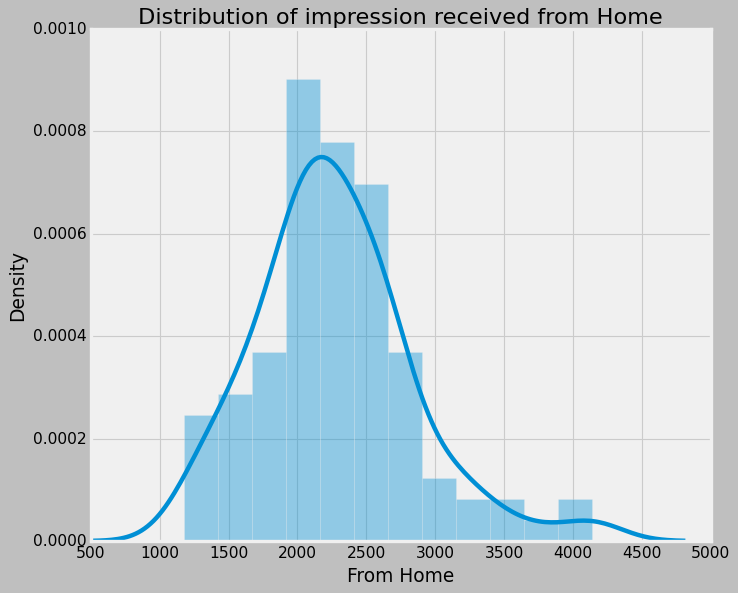

In [17]:
plt.figure(figsize=(10,8))
plt.style.use("fivethirtyeight")
plt.title("Distribution of impression received from Home")
sns.distplot(df["From Home"])
plt.show()

from the above distribution we can analyze that its has to reach all the followers daily

**Lets look at the distribution of From Hashtags**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



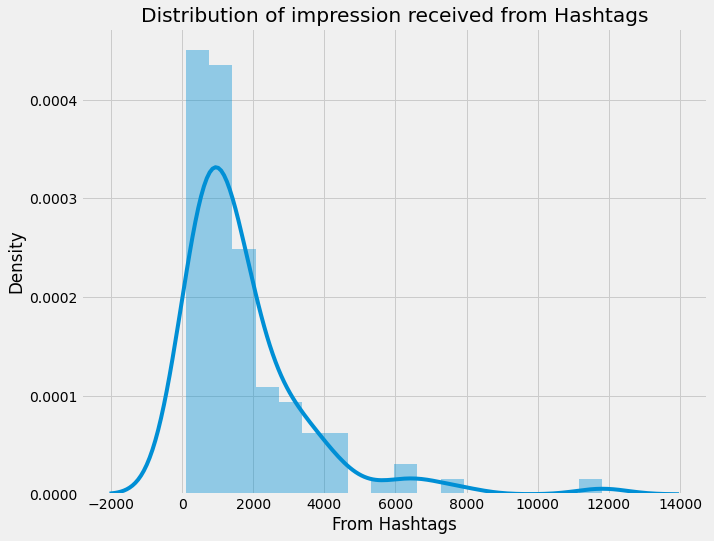

In [9]:
plt.figure(figsize=(10,8))
plt.title("Distribution of impression received from Hashtags")
sns.distplot(df["From Hashtags"])
plt.show()

**Looking at hashtag impressions shows that not all posts can be reached using hashtags, but many new users can be reached from hashtags**

**lets analyze impression from the explore columns received from instagram**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



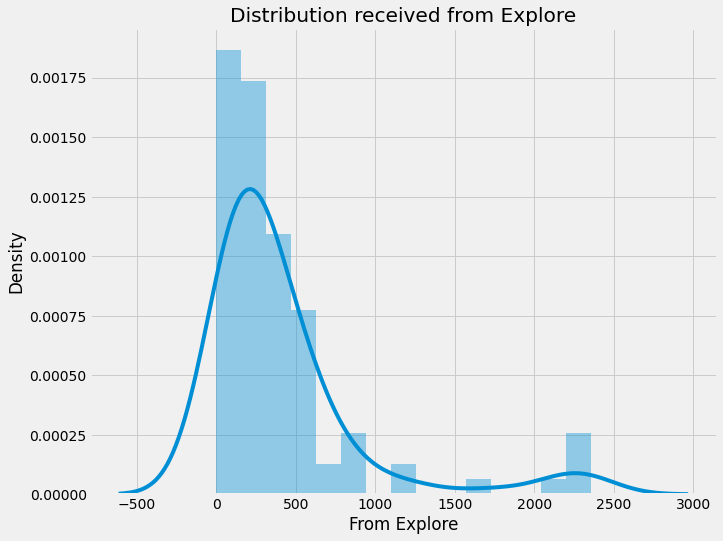

In [10]:
plt.figure(figsize=(10,8))
plt.title("Distribution received from Explore")
sns.distplot(df["From Explore"])
plt.show()

**by looking at the Distribution received from Explore we can say that instagram doesnt recommend our post much to the user**

**now lets have a look at the percentage of impressions** 

In [61]:
home = df["From Home"].sum()
hashtags = df["From Hashtags"].sum()
explore = df["From Explore"].sum()
other = df["From Other"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]

fig = px.pie(df,values=values, names=labels,title="Impressions on Instagram Posts From Various Sources")
fig.show("colab")

In [12]:
#converting float to int
df["Impressions"]=df["Impressions"].astype(int)
df["From Hashtags"] = df["From Hashtags"].astype(int)
df["From Explore"]=df["From Explore"].astype(int)
df["From Other"] = df["From Other"].astype(int)

**Analyzing Content**

Now let’s analyze the content of Instagram posts. The dataset has two columns, namely caption and hashtags, which will help us understand the kind of content  user post on Instagram.

Let’s create a wordcloud of the caption column to look at the most used words in the caption of my Instagram posts:

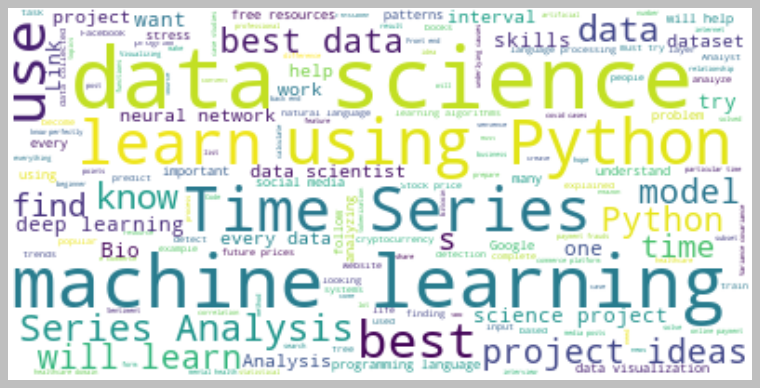

In [13]:
text=" ".join(i for i in df.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now let’s create a wordcloud of the hashtags column to look at the most used hashtags in my Instagram posts:

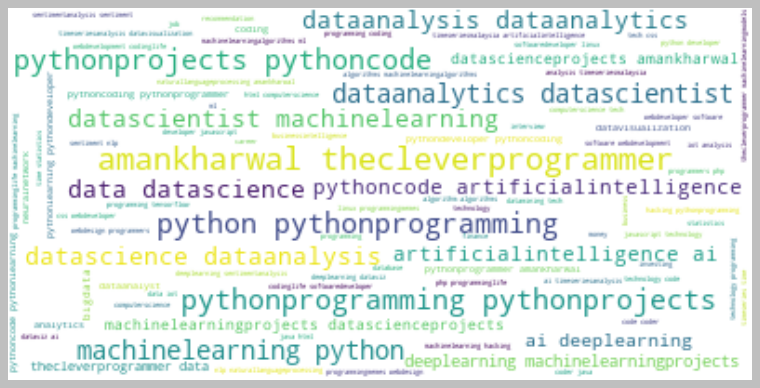

In [14]:
text=" ".join(i for i in df.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Analyzing Relationships**

Now let’s analyze relationships to find the most important factors of our Instagram reach. It will also help us in understanding how the Instagram algorithm works.

In [62]:
fig = px.scatter(data_frame=df,x="Impressions",y="Likes",size="Likes",trendline="ols",
                 title="Relationship between impression and likes")
fig.show("colab")

In [24]:
df.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

There is linear relationship between number of likes and the reach of user instagram.

now lets see the relationship between no.of comments and no.of impression of user instagam.

In [25]:
fig = px.scatter(data_frame=df,x="Impressions",y="Comments",size="Comments",trendline="ols",
                 title="Relationship between comments and impressions")
fig.show()

it looks like the no.of comments we get on post doesnt affect its reach.

let see the relationship between no.of shares and impressions

In [26]:
fig = px.scatter(data_frame=df,x="Impressions",y="Shares",size="Shares",
                 trendline="ols",title="Relationship between impressions and share")
fig.show()

A more number of share will result in higher reach.but share desnt affect more reach then likes do.

**Lets see the relationship between no.of saves and impressions**

In [27]:
fig = px.scatter(data_frame=df,x="Impressions",y="Saves",size="Saves",trendline="ols",
                 title="Relationship between impressions and saves")
fig.show()

There is a linear relationship between the nsaved and the reach of  Instagram post. Now let’s have a look at the correlation of all the columns with the Impressions column:

In [29]:
correlation = df.corr()
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
Likes             0.896277
From Hashtags     0.892682
Follows           0.804064
Profile Visits    0.774393
Saves             0.625600
From Home         0.603378
From Explore      0.498389
Shares            0.476617
From Other        0.429227
Comments          0.247201
Name: Impressions, dtype: float64


so we can say that more likes and hashtags will get you more reach on instagram

**Analyzing Conversion Rate**

In Instagram,conversion rate means how many followers you are getting from number of profile visit from a post.


conversion rate formulae: (follows/profile visits)*100

In [35]:
df["Follows"]= df["Follows"].astype(int)
df["Profile Visits"]=df["Profile Visits"].astype(int)

In [37]:
conversions_rate = (df["Follows"].sum()/df["Profile Visits"].sum())*100
conversions_rate

31.17770767613039

So the conversation rate of my Instagram account is 31% which sounds like a very good conversation rate

lets see the relationship between follows and profile visits

In [40]:
fig = px.scatter(data_frame=df,x="Profile Visits",y="Follows",size="Follows",trendline="ols",
                 title="Relationship between profile visits and Follows")
fig.show()

The relationship between profile visits and followes is also linear.